# Example from sklearn
This example demonstrates how to generate a dataset and bicluster it using the Spectral Co-Clustering algorithm.
The dataset is generated using the make_biclusters function, which creates a matrix of small values and implants bicluster with large values. The rows and columns are then shuffled and passed to the Spectral Co-Clustering algorithm. Rearranging the shuffled matrix to make biclusters contiguous shows how accurately the algorithm found the biclusters.

Automatically created module for IPython interactive environment
consensus score: 1.000


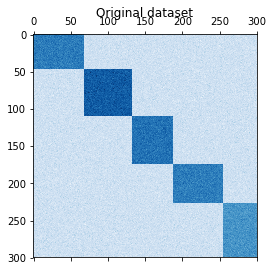

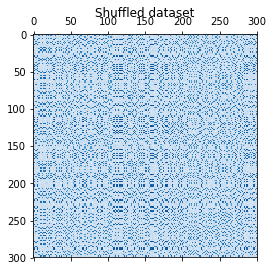

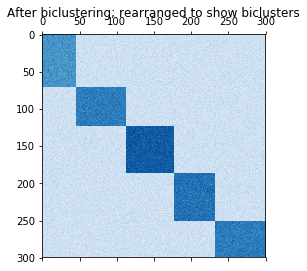

In [1]:
print(__doc__)

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score

data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original dataset")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Shuffled dataset")

model = SpectralCoclustering(n_clusters=5, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (rows[:, row_idx], columns[:, col_idx]))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")

plt.show()
